# Topic Modelling: _Documenting the American South_ 1866-1929

This JupyterNotebook was devised by DARIAH and can be retrieved from https://github.com/DARIAH-DE/Topics.

In [1]:
from pathlib import Path
import dariah
import cophi
from cophi_toolbox import preprocessing
import os
import metadata_toolbox.utils as metadata
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

## Preprocessing the corpus

Setting the path:

In [2]:
directory = Path("data", "1866-1929-chunks")

Displaying the files in the folder:

In [3]:
sorted(os.listdir(path=directory))

['church-hatcher-hatcher_0000.txt',
 'church-hatcher-hatcher_0001.txt',
 'church-hatcher-hatcher_0002.txt',
 'church-hatcher-hatcher_0003.txt',
 'church-hatcher-hatcher_0004.txt',
 'fpn-bruce-bruce_0000.txt',
 'fpn-bruce-bruce_0001.txt',
 'fpn-bruce-bruce_0002.txt',
 'fpn-bruce-bruce_0003.txt',
 'fpn-bruce-bruce_0004.txt',
 'fpn-burton-burton_0000.txt',
 'fpn-burton-burton_0001.txt',
 'fpn-burtont-burton_0000.txt',
 'fpn-burtont-burton_0001.txt',
 'fpn-ferebee-ferebee_0000.txt',
 'fpn-hughes-hughes_0000.txt',
 'fpn-hughes-hughes_0001.txt',
 'fpn-hughes-hughes_0002.txt',
 'fpn-hughes-hughes_0003.txt',
 'fpn-hughes-hughes_0004.txt',
 'fpn-lane-lane_0000.txt',
 'fpn-lane-lane_0001.txt',
 'fpn-lane-lane_0002.txt',
 'fpn-mason-mason_0000.txt',
 'fpn-mason-mason_0001.txt',
 'fpn-robinson-robinson_0000.txt',
 'fpn-robinson-robinson_0001.txt',
 'fpn-robinson-robinson_0002.txt',
 'fpn-robinson-robinson_0003.txt',
 'fpn-robinson-robinson_0004.txt',
 'fpn-veney-veney_0000.txt',
 'fpn-washeducatio

In [4]:
pattern = '{abbr}-{author}-{author2}'

Generates a table featuring the files' abbreviation, author and second mention of author:

In [5]:
meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in directory.glob('*.txt')])
meta[:5]

,abbr,author,author2
data\1866-1929-chunks\church-hatcher-hatcher_0000.txt,church,hatcher,hatcher_0000
data\1866-1929-chunks\church-hatcher-hatcher_0001.txt,church,hatcher,hatcher_0001
data\1866-1929-chunks\church-hatcher-hatcher_0002.txt,church,hatcher,hatcher_0002
data\1866-1929-chunks\church-hatcher-hatcher_0003.txt,church,hatcher,hatcher_0003
data\1866-1929-chunks\church-hatcher-hatcher_0004.txt,church,hatcher,hatcher_0004


Read the documents and display the text of a sample file:

In [6]:
corpus = list(preprocessing.read_files(meta.index))
#corpus[1]

### Tokenising using cophi
(see https://github.com/cophi-wue/cophi-toolbox/blob/master/notebooks/introducing-cophi.ipynb):

In [7]:
corpus, metadata = cophi.corpus(directory,
                      lowercase=True,
                      token_pattern=r"\p{Letter}+\p{Connector_Punctuation}?\p{Letter}+",
                      metadata=True)

In [8]:
corpus.stats

documents        536.0
types          44565.0
tokens       4883665.0
hapax          27408.0
dtype: float64

### Removal of most frequent words, hapax legomena, and person names
List of most frequent words:

In [9]:
#help(corpus)

In [10]:
mfw = corpus.mfw(70)
mfw#[:15]

['the',
 'be',
 'and',
 'of',
 'to',
 'in',
 'he',
 'have',
 'that',
 'for',
 'his',
 'it',
 'they',
 'as',
 'with',
 'my',
 'not',
 'at',
 'we',
 'this',
 'on',
 'by',
 'but',
 'do',
 'she',
 'from',
 'all',
 'man',
 'one',
 'you',
 'would',
 'say',
 'which',
 'go',
 'their',
 'when',
 'so',
 'who',
 'or',
 'there',
 'an',
 'time',
 'make',
 'her',
 'come',
 'no',
 'will',
 'our',
 'see',
 'year',
 'people',
 'take',
 'could',
 'give',
 'if',
 'day',
 'out',
 'mr',
 'some',
 'other',
 'up',
 'get',
 'know',
 'work',
 'after',
 'good',
 'great',
 'then',
 'what',
 'well']

Hapax legomena (words occuring only once in the corpus):

In [11]:
corpus.hapax[:10]

['aa',
 'aand',
 'aback',
 'abaddon',
 'abadie',
 'abagail',
 'abanbridge',
 'abandoning',
 'abase',
 'abasement']

Default stopword list:

In [12]:
path_to_stopwordlist = "data/stopwords/en.txt"
extern_stopwords = [line.strip() for line in open(path_to_stopwordlist, 'r')]
extern_stopwords[:10]

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act']

List of person names generated through NLTK's Named Entitity Recognition:

In [13]:
path_to_ner = "data/stopwords/docsouth-ner.txt"
ner = [line.strip() for line in open(path_to_ner, 'r')]
ner[:10]

['mr. boyce',
 'old frank',
 'miss bett',
 'oft',
 'nelly',
 'walter brooks',
 'beamed',
 'gone down',
 'peter coffin',
 'englishman']

Removal of most frequent words, hapax legomena, the default stopword list, and the person names:

In [14]:
features = mfw + corpus.hapax + extern_stopwords + ner

print(f"{len(features)} types will be removed from the corpus.")

59454 types will be removed from the corpus.


Displaying meta data

In [15]:
metadata.iloc[:10]

,uuid,filepath,parent,title,suffix
0,10ed4f11-3f70-11ee-b6d3-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0000,.txt
1,10efe74f-3f70-11ee-9d7d-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0001,.txt
2,10f16e83-3f70-11ee-9601-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0002,.txt
3,10f2ce25-3f70-11ee-8a3c-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0003,.txt
4,10f39195-3f70-11ee-a2b6-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0004,.txt
5,10f51837-3f70-11ee-89c2-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0000.txt,data\1866-1929-chunks,fpn-bruce-bruce_0000,.txt
6,10f69f06-3f70-11ee-aaaa-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0001.txt,data\1866-1929-chunks,fpn-bruce-bruce_0001,.txt
7,10f8251e-3f70-11ee-9d91-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0002.txt,data\1866-1929-chunks,fpn-bruce-bruce_0002,.txt
8,10f9ac23-3f70-11ee-aa68-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0003.txt,data\1866-1929-chunks,fpn-bruce-bruce_0003,.txt
9,10fb0c02-3f70-11ee-ace1-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0004.txt,data\1866-1929-chunks,fpn-bruce-bruce_0004,.txt


The corpus is represented as a document-term matrix with absolute word frequencies from which the features you selected above are dropped:

In [16]:
dtm = corpus.drop(corpus.dtm, features).fillna(0).astype(int)
dtm.iloc[:, :5]

,ab,abaft,abandon,abandonment,abatis
10ed4f11-3f70-11ee-b6d3-00090ffe0001,0,0,0,0,0
10efe74f-3f70-11ee-9d7d-00090ffe0001,0,0,0,0,0
10f16e83-3f70-11ee-9601-00090ffe0001,0,0,2,0,0
10f2ce25-3f70-11ee-8a3c-00090ffe0001,0,0,1,0,0
10f39195-3f70-11ee-a2b6-00090ffe0001,0,0,0,0,0
...,...,...,...,...,...
142e92fe-3f70-11ee-9fc2-00090ffe0001,0,0,1,0,0
1430b5fe-3f70-11ee-b227-00090ffe0001,0,0,0,0,0
14323c2c-3f70-11ee-8892-00090ffe0001,0,0,0,0,0
1433c313-3f70-11ee-93d7-00090ffe0001,0,0,0,0,0


In [17]:
dtm = corpus.map_metadata(data=dtm,
                          metadata=metadata,
                          uuid="uuid",
                          fields=["title"]).fillna(0).astype(int)
dtm.iloc[:5,:10]

,ab,abaft,abandon,abandonment,abatis,abbeville,abbeyville,abble,abbott,abdelkader
church-hatcher-hatcher_0000,0,0,0,0,0,0,0,0,0,0
church-hatcher-hatcher_0001,0,0,0,0,0,0,0,0,0,0
church-hatcher-hatcher_0002,0,0,2,0,0,0,0,0,0,0
church-hatcher-hatcher_0003,0,0,1,0,0,0,0,0,0,0
church-hatcher-hatcher_0004,0,0,0,0,0,0,0,0,0,0


## Training the model

In [18]:
# Show all rows of the topic model
pd.set_option('display.max_rows', None)

In [19]:
model = dariah.core.LDA(num_topics=80,
                        num_iterations=5000,
                        mallet="C:/mallet/bin/mallet.bat")
model

<Model: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [20]:
model.fit(dtm)

In [21]:
model.topics.iloc[:, :10]

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
topic0,officer,graduate,lieutenant,prejudice,examination,treatment,thing,article,send,privilege
topic1,dollar,number,buy,sail,sell,child,voyage,indian,pound,passage
topic2,gaine,reply,hand,remark,sez,exclaim,dem,dog,bout,cho
topic3,child,thing,plantation,sell,sunday,whip,folk,buy,morning,hire
topic4,meeting,convention,american,constitution,audience,speaker,douglasss,mob,september,question
topic5,plantation,whip,punishment,bring,hog,send,child,hire,punish,witch
topic6,government,petition,meeting,audience,spend,condition,visit,sibyl,congress,pepul
topic7,dollar,plantation,hour,purchase,building,dream,bury,frequently,complete,storm
topic8,hand,child,morning,send,bring,sell,buy,door,side,farm
topic9,student,building,general,institution,secure,number,spend,morning,dollar,industrial


## Inspecting the model

Topic-document distribution

In [22]:
model.topic_document.iloc[:15, :15]

1,church-hatcher-hatcher_0000,church-hatcher-hatcher_0001,church-hatcher-hatcher_0002,church-hatcher-hatcher_0003,church-hatcher-hatcher_0004,fpn-bruce-bruce_0000,fpn-bruce-bruce_0001,fpn-bruce-bruce_0002,fpn-bruce-bruce_0003,fpn-bruce-bruce_0004,fpn-burton-burton_0000,fpn-burton-burton_0001,fpn-burtont-burton_0000,fpn-burtont-burton_0001,fpn-ferebee-ferebee_0000
topic0,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002,0.000001,9.644318e-07,9.689171e-07,8.765164e-07,8.121630e-07,0.000001,0.000001,9.607255e-07,0.000001,0.000001
topic1,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002,0.000001,9.644318e-07,9.689171e-07,8.765164e-07,8.121630e-07,0.000001,0.000001,9.607255e-07,0.000001,0.000001
topic2,8.852064e-07,7.677661e-07,7.296714e-07,9.067580e-03,0.000002,0.000001,9.644318e-07,9.689171e-07,8.765164e-07,8.121630e-07,0.000001,0.000001,9.607255e-07,0.000001,0.000001
topic3,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002,0.000001,9.644318e-07,9.689171e-07,8.765164e-07,8.121630e-07,0.190594,0.000001,9.607255e-07,0.000001,0.000001
topic4,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002,0.000001,9.644318e-07,9.689171e-07,8.765164e-07,8.121630e-07,0.000001,0.000001,9.607255e-07,0.000001,0.000001
topic5,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002,0.119857,1.705125e-01,6.898787e-02,8.765164e-07,8.121630e-07,0.000001,0.000001,9.607255e-07,0.000001,0.000001
topic6,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002,0.000001,9.644318e-07,9.302573e-03,8.765164e-07,8.121630e-07,0.000001,0.000001,9.607255e-07,0.000001,0.000001
topic7,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002,0.000001,9.644318e-07,9.689171e-07,8.765164e-07,8.121630e-07,0.000001,0.036924,9.607255e-07,0.028425,0.000001
topic8,8.852064e-07,7.677661e-07,7.296714e-07,3.885840e-02,0.030085,0.129915,1.080173e-01,1.395250e-01,8.765164e-07,8.121630e-07,0.348325,0.000001,1.906089e-01,0.085272,0.000001
topic9,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002,0.000001,9.644318e-07,9.689171e-07,5.469550e-02,2.793922e-02,0.000001,0.000001,1.537257e-02,0.000001,0.000001


Topic-word distribution

In [23]:
model.topic_word.iloc[:, :]

,abaft,abandon,abandonment,abatis,abbeville,abbeyville,abble,abbott,abdelkader,abdie,...,zem,zenana,zenith,zephyr,zetetic,zips,zone,zulu,zulus,æsculapius
topic0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
topic1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
topic2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,3.01,7.01,0.01
topic3,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
topic4,0.01,11.01,4.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
topic5,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
topic6,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
topic7,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
topic8,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
topic9,0.01,6.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [24]:
#import pandas as pd

# Assuming you have model.topic_document and model.topics as Pandas DataFrames
# Export the topic-document distribution to a CSV file
#model.topic_document.to_csv('topic_document_distribution.csv', index=False)

# Export the topic-word distribution to a CSV file
#model.topics.to_csv('topic_word_distribution.csv', index=False)

## Visualising the model

In [25]:
vis = dariah.core.Vis(model)
vis

<Visualization: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [26]:
#%matplotlib inline
#vis.topic(1)

In [27]:
# Information about possible visualisations:
#help(vis)

In [28]:
#%matplotlib inline

#vis.topic_document()

<AxesSubplot:ylabel='1'>

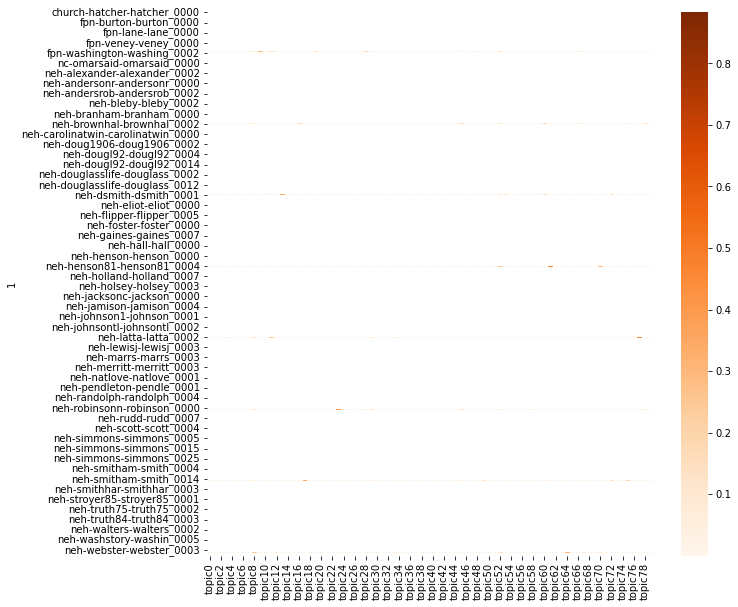

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] 

vis.topic_document(cmap='Oranges')

<AxesSubplot:>

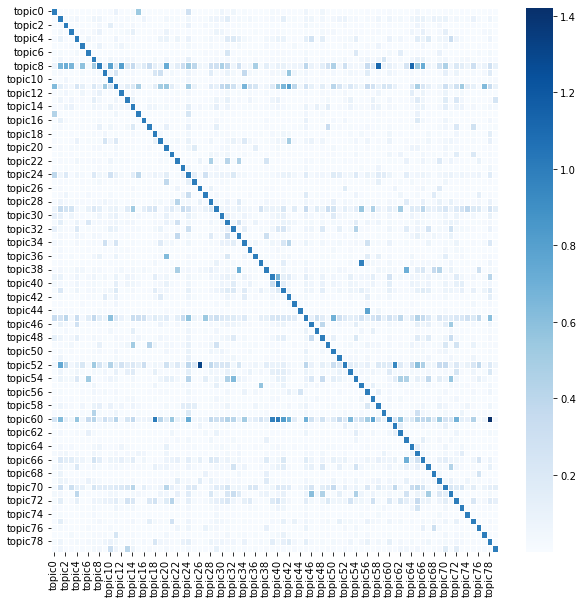

In [30]:
# Comparison of topics
vis.topic_similarities(cbar=True)

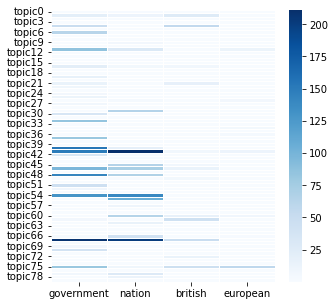

In [31]:
# Comparing the frequency of specific words in the distinct topics
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5] 

vis.topic_word(words=["government", "nation", "british", "european"])

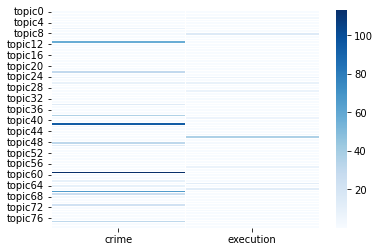

In [32]:
%matplotlib inline

vis.topic_word(words=["crime", "execution"], cbar=True)

Distribution of words within a topic:

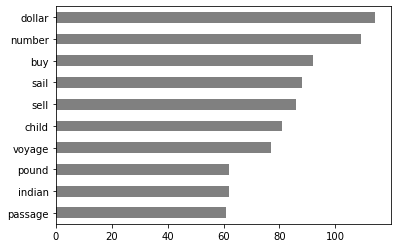

In [33]:
vis.topic("topic1")
plt.rcParams['figure.figsize'] = [10, 10]

Distribution of topics within a given document:

KeyError: 'neh-arthur-arthur'

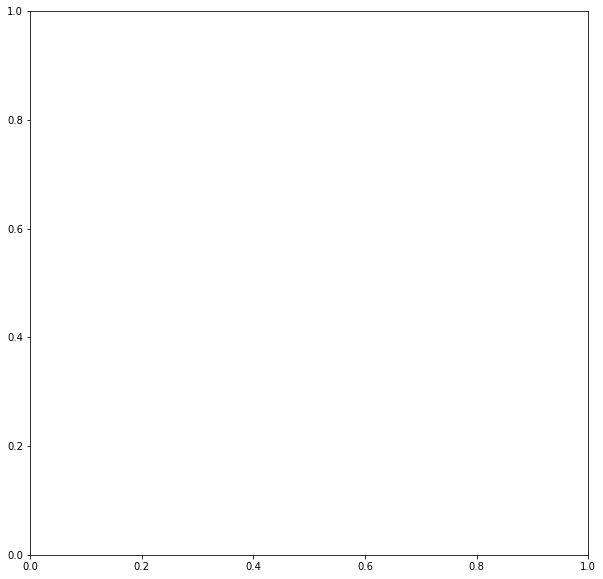

In [34]:
vis.document("neh-arthur-arthur")
plt.rcParams['figure.figsize'] = [30, 50]